In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# In this dataframe, each user has at least one event 8 with him/her
events = pd.read_feather('users_with_event8.csv')

In [3]:
def counts(df, top_n):
    counts = df['event'].value_counts()
    counts = counts[:top_n,]
    plt.figure(figsize=(10,5))
    sns.barplot(counts.index, counts.values, alpha=0.8)
    plt.title(f"Top {top_n} Events")
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Event Index', fontsize=12)
    plt.show()

/data/anishdalal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


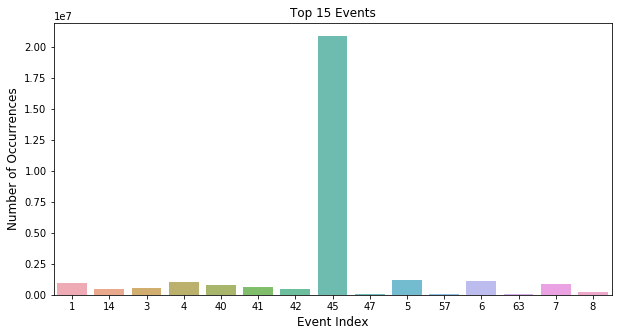

In [4]:
counts(events, 15)

Looks like event 45 index seems to dominate occurences. Perhaps not too much signal to be gained

In [5]:
filtered_events = events.drop(events[events['event'] == '45' ].index)

/data/anishdalal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


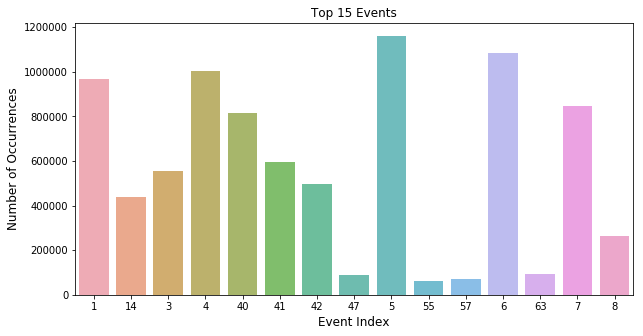

In [6]:
counts(filtered_events, 15)

What are the most common events that just precede the first Event 8 occurence for random 20 users?

In [126]:
filtered_events['event_timestamp'] = pd.to_datetime(filtered_events['event_timestamp'], unit='ms')

In [137]:
users = filtered_events.user_id_hash.unique()

In [138]:
def total_events_before_event8(df, diff):
    counts = np.zeros(42)
    rnd_users = np.random.choice(users, 100)
    for i in range(len(rnd_users)):
        tmp = events_before_event8_per_user(df, i, diff)
        counts += tmp
    return counts

def events_before_event8_per_user(df, user_idx, diff):
    counts = np.zeros(42)
    event8 = df[(df.user_id_hash == users[user_idx]) & (df.event == '8')].copy()
    event8['start_time'] = event8['event_timestamp'] - pd.to_timedelta(diff, unit='d')
    start_time = event8.iloc[0]['start_time']
    end_time = event8.iloc[0]['event_timestamp']
    event8 = filtered_events[(filtered_events.user_id_hash == users[user_idx]) & 
                         (filtered_events.event_timestamp >= start_time) & 
                         (filtered_events.event_timestamp <= end_time)].copy()
    c = event8.event.value_counts()
    for i in range(len(c.index)):
        try:
            idx = int(c.index[i])
            counts[idx] += c.iloc[i]
        except:
            pass
    return counts

In [139]:
counts = total_events_before_event8(filtered_events, 1)

/data/anishdalal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


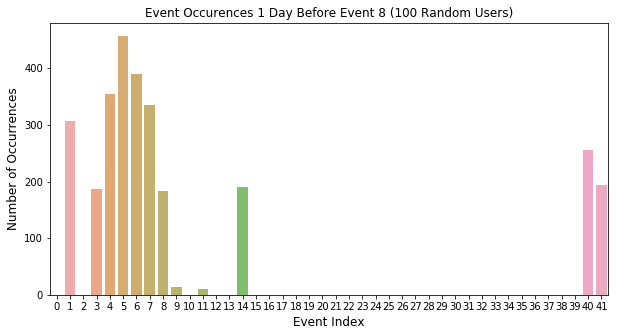

In [142]:
plt.figure(figsize=(10,5))
sns.barplot(list(range(42)), counts, alpha=0.8)
plt.title(f"Event Occurences 1 Day Before Event 8 (100 Random Users)")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event Index', fontsize=12)
plt.show()